# Lets Use Convolutional Nueral Networks for Image Classification
## Lets Use Intel Image Dataset for this Case Study


This Data contains around 25k images of size 150x150 distributed under 6 categories.

{'buildings' -> 0,
'forest' -> 1,
'glacier' -> 2,
'mountain' -> 3,
'sea' -> 4,
'street' -> 5 }


### GPU Allocated

In [ ]:
!nvidia-smi 

Sun Dec 25 05:30:49 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   72C    P0    28W /  70W |      0MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

### Import Section

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import time
import os 
import cv2
import glob
import pathlib
import datetime
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
# if you keras is not using tensorflow as backend set "KERAS_BACKEND=tensorflow" use this command
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score,log_loss,confusion_matrix,classification_report
import tensorflow as tf
!pip install keras-tuner 
import keras_tuner as kt
from tensorflow.keras import utils
from tensorflow.keras.initializers import RandomNormal
from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import Dense,Input,Activation,Dropout,BatchNormalization,Conv2D,MaxPooling2D,AveragePooling2D,Flatten
from tensorflow.keras.utils import plot_model
from tensorflow.keras.callbacks import ModelCheckpoint,EarlyStopping,LearningRateScheduler,ReduceLROnPlateau,TensorBoard
from tensorflow.keras.models import Model
from tensorflow.keras.utils import plot_model
import warnings
warnings.filterwarnings('ignore')
from tqdm import tqdm
tqdm.pandas()
from keras_preprocessing.image import ImageDataGenerator


In [ ]:
!pip install -q kaggle
from google.colab import files
files.upload()
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 /root/.kaggle/kaggle.json
!mkdir dataset
! kaggle datasets download -d puneet6060/intel-image-classification
!unzip intel-image-classification.zip -d dataset

## Lets Analyse the dataset

In [ ]:
data_dir = '/content/dataset'
data_dir = pathlib.Path(data_dir)
train_buildings=list(data_dir.glob('seg_train/seg_train/buildings/*'))
train_forest=list(data_dir.glob('seg_train/seg_train/forest/*'))
train_glacier=list(data_dir.glob('seg_train/seg_train/glacier/*'))
train_mountain=list(data_dir.glob('seg_train/seg_train/mountain/*'))
train_sea=list(data_dir.glob('seg_train/seg_train/sea/*'))
train_street=list(data_dir.glob('seg_train/seg_train/street/*'))
test_buildings=list(data_dir.glob('seg_test/seg_test/buildings/*'))
test_forest=list(data_dir.glob('seg_test/seg_test/forest/*'))
test_glacier=list(data_dir.glob('seg_test/seg_test/glacier/*'))
test_mountain=list(data_dir.glob('seg_test/seg_test/mountain/*'))
test_sea=list(data_dir.glob('seg_test/seg_test/sea/*'))
test_street=list(data_dir.glob('seg_test/seg_test/street/*'))
print('*'*30 + ' train Images '+'*'*30  )
print()
print('Number of train_buildings Images : ',len(train_buildings))
print('Number of train_forest Images : ',len(train_forest))
print('Number of train_glacier Images : ',len(train_glacier))
print('Number of train_mountain Images : ',len(train_mountain))
print('Number of train_sea Images : ',len(train_sea))
print('Number of train_street Images : ',len(train_street))
print()
print('*'*30 + ' test Images '+'*'*30  )
print()
print('Number of test_buildings Images : ',len(test_buildings))
print('Number of test_forest Images : ',len(test_forest))
print('Number of test_glacier Images : ',len(test_glacier))
print('Number of test_mountain Images : ',len(test_mountain))
print('Number of test_sea Images : ',len(test_sea))
print('Number of test_street Images : ',len(test_street))


****************************** train Images ******************************

Number of train_buildings Images :  2191
Number of train_forest Images :  2271
Number of train_glacier Images :  2404
Number of train_mountain Images :  2512
Number of train_sea Images :  2274
Number of train_street Images :  2382

****************************** test Images ******************************

Number of test_buildings Images :  437
Number of test_forest Images :  474
Number of test_glacier Images :  553
Number of test_mountain Images :  525
Number of test_sea Images :  510
Number of test_street Images :  501


## Lets See Few Images

****************************** Sample Buildings ******************************


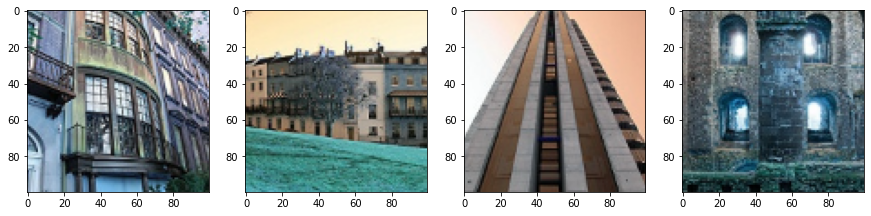

****************************** Sample forest ******************************


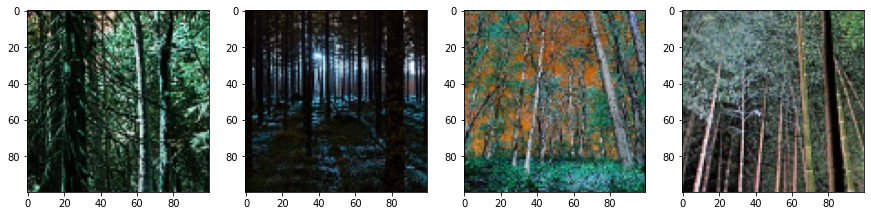

****************************** Sample glacier ******************************


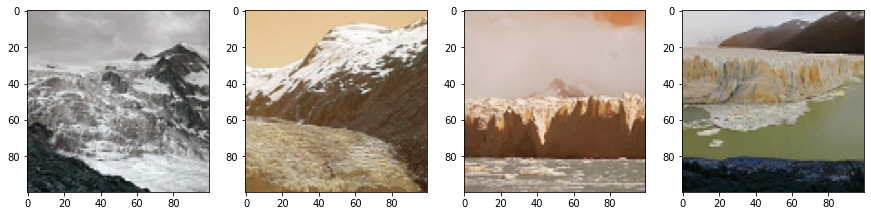

****************************** Sample mountain ******************************


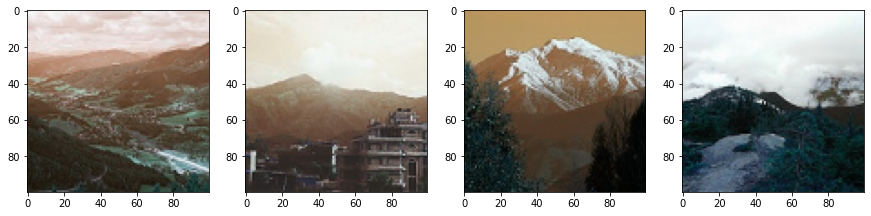

****************************** Sample sea ******************************


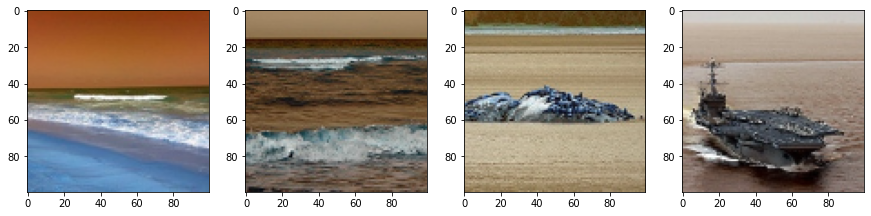

****************************** Sample street ******************************


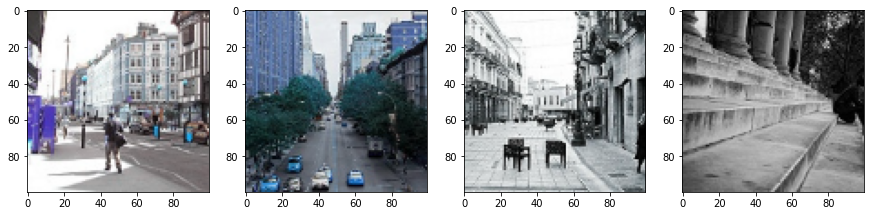

In [ ]:
fig = plt.figure(figsize=(15, 10))
rows = 1
columns = 4
print('*'*30 + ' Sample Buildings ' + '*'*30)
for i in range(4):  
  fig.add_subplot(rows, columns, i+1)
  image = cv2.imread(str(list(data_dir.glob('seg_train/seg_train/buildings/*'))[i+50]))
  image = cv2.resize(image , (100 , 100))
  plt.imshow(image)
plt.show()
fig = plt.figure(figsize=(15, 10))
print('*'*30 + ' Sample forest ' + '*'*30)
for i in range(4):  
  fig.add_subplot(rows, columns, i+1)
  image = cv2.imread(str(list(data_dir.glob('seg_train/seg_train/forest/*'))[i+50]))
  image = cv2.resize(image , (100 , 100))
  plt.imshow(image)
plt.show()
fig = plt.figure(figsize=(15, 10))
print('*'*30 + ' Sample glacier ' + '*'*30)
for i in range(4):  
  fig.add_subplot(rows, columns, i+1)
  image = cv2.imread(str(list(data_dir.glob('seg_train/seg_train/glacier/*'))[i+50]))
  image = cv2.resize(image , (100 , 100))
  plt.imshow(image)
plt.show()
fig = plt.figure(figsize=(15, 10))
print('*'*30 + ' Sample mountain ' + '*'*30)
for i in range(4):  
  fig.add_subplot(rows, columns, i+1)
  image = cv2.imread(str(list(data_dir.glob('seg_train/seg_train/mountain/*'))[i+50]))
  image = cv2.resize(image , (100 , 100))
  plt.imshow(image)
plt.show()
fig = plt.figure(figsize=(15, 10))
print('*'*30 + ' Sample sea ' + '*'*30)
for i in range(4):  
  fig.add_subplot(rows, columns, i+1)
  image = cv2.imread(str(list(data_dir.glob('seg_train/seg_train/sea/*'))[i+50]))
  image = cv2.resize(image , (100 , 100))
  plt.imshow(image)
plt.show()
fig = plt.figure(figsize=(15, 10))
print('*'*30 + ' Sample street ' + '*'*30)
for i in range(4):  
  fig.add_subplot(rows, columns, i+1)
  image = cv2.imread(str(list(data_dir.glob('seg_train/seg_train/street/*'))[i+50]))
  image = cv2.resize(image , (100 , 100))
  plt.imshow(image)
plt.show()

## Lets create train and test data generators

In [ ]:
train_datagen = ImageDataGenerator(rescale=1./255,rotation_range=45,shear_range=0.2,width_shift_range=0.2,height_shift_range=0.2,zoom_range=0.2,horizontal_flip=True)
test_datagen = ImageDataGenerator(rescale=1./255)
train_generator = train_datagen.flow_from_directory('/content/dataset/seg_train/seg_train',target_size=(150, 150),batch_size=32,class_mode='categorical')
test_generator = test_datagen.flow_from_directory('/content/dataset/seg_test/seg_test',target_size=(150, 150),batch_size=32,class_mode='categorical')

Found 14034 images belonging to 6 classes.
Found 3000 images belonging to 6 classes.


## Lets see what image data generator got

In [ ]:
for batch in train_generator:
  images = batch[0]
  labels = batch[1]
  fig = plt.figure(figsize=(25, 25))
  for i in range(len(images)):  
    fig.add_subplot(6, 6, i+1)
    plt.imshow(images[i])
    plt.colorbar()
    plt.title(labels[i])
  plt.show()
  break


Output hidden; open in https://colab.research.google.com to view.

* what value assigned to which category:

1. Building.  --- > [1,0,0,0,0,0]
2. forest.  --- > [0,1,0,0,0,0]
3. glacier.  --- > [0,0,1,0,0,0]
4. mountain.  --- > [0,0,0,1,0,0]
5. sea.  --- > [0,0,0,0,1,0]
6. street.  --- > [0,0,0,0,0,1]

Lets Build the model using Keras Tuner


In [11]:
Input_Shape = (150,150,3)
outputshape = 6
epochs = 30
batch_size = 32

In [12]:
def build_model(hp):
  model = Sequential()
  counter = 0
  for i in range(hp.Int('num_layers',min_value = 1, max_value = 4)):
    if counter ==0:
      model.add(
          Conv2D(
              filters=hp.Int('conv_filter'+str(i), min_value=10, max_value=30, step=5),
              kernel_size=hp.Choice('conv_kernel'+str(i), values = [3,5]),
              activation = hp.Choice('activation'+str(i),values=['relu','tanh','sigmoid']),
              kernel_initializer = hp.Choice('initialiser'+str(i),values = ['he_normal','glorot_normal']),
              padding="same",
              input_shape = Input_Shape
          )
          )
      model.add(
      MaxPooling2D(
          pool_size=hp.Choice('maxpooling'+str(i), values = [2,3]),
          padding="same"
          
      )
      )
    else:
      model.add(
          Conv2D(
              filters=hp.Int('conv_filter'+str(i), min_value=10, max_value=30, step=5),
              kernel_size=hp.Choice('conv_kernel'+str(i), values = [3,5]),
              activation = hp.Choice('activation'+str(i),values=['relu','tanh','sigmoid']),
              kernel_initializer = hp.Choice('initialiser'+str(i),values = ['he_normal','glorot_normal']),
              padding="same",
          )
          )
      model.add(
      MaxPooling2D(
          pool_size=hp.Choice('maxpooling'+str(i), values = [2,3]),
          padding="same"
          
      )
      )
    counter += 1
  model.add(Flatten())
  model.add(
            Dense(
                hp.Int('denseunitsoutside', min_value = 100, max_value = 300,step =100),
                activation = hp.Choice('activationoutside',values=['relu','tanh','sigmoid']),
                kernel_initializer = hp.Choice('initialiseroutside',values = ['he_normal','glorot_normal'])
            ) 
            )
  model.add(Dense(outputshape,activation = 'softmax'))
  model.compile(optimizer = hp.Choice('optimiser', values = ['rmsprop','sgd','adam']),loss='categorical_crossentropy',metrics=['accuracy'])
  return model
  


In [14]:
tuner_random = kt.RandomSearch(build_model,objective = 'val_accuracy',max_trials = 4, directory = "hyperparametertuning",project_name = 'BinaryCNNrun5')

In [15]:
tuner_random.search(train_generator,epochs = 2,validation_data = test_generator)

Trial 4 Complete [00h 02m 50s]
val_accuracy: 0.6236666440963745

Best val_accuracy So Far: 0.6896666884422302
Total elapsed time: 00h 13m 26s


In [16]:
tuner_random.get_best_hyperparameters()[0].values

{'num_layers': 3,
 'conv_filter0': 30,
 'conv_kernel0': 3,
 'activation0': 'tanh',
 'initialiser0': 'glorot_normal',
 'maxpooling0': 3,
 'denseunitsoutside': 300,
 'activationoutside': 'relu',
 'initialiseroutside': 'he_normal',
 'optimiser': 'rmsprop',
 'conv_filter1': 30,
 'conv_kernel1': 5,
 'activation1': 'tanh',
 'initialiser1': 'he_normal',
 'maxpooling1': 3,
 'conv_filter2': 20,
 'conv_kernel2': 5,
 'activation2': 'tanh',
 'initialiser2': 'he_normal',
 'maxpooling2': 2}

In [17]:
best_model = tuner_random.get_best_models(num_models = 1)[0]
best_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 150, 150, 30)      840       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 50, 50, 30)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 50, 50, 30)        22530     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 17, 17, 30)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 17, 17, 20)        15020     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 9, 9, 20)         0

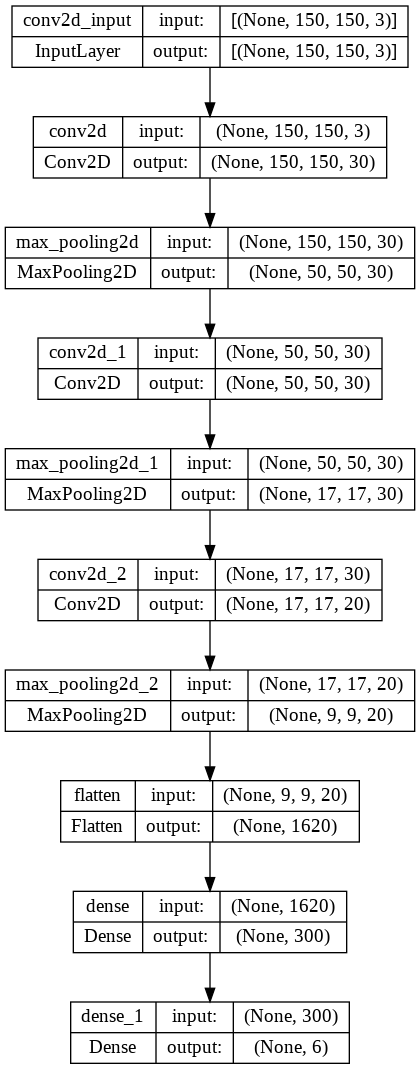

In [18]:
plot_model(best_model, show_shapes=True)

In [19]:
best_model.save('Best_Model')

In [20]:
!zip -r /content/Best_Model.zip /content/Best_Model

  adding: content/Best_Model/ (stored 0%)
  adding: content/Best_Model/saved_model.pb (deflated 89%)
  adding: content/Best_Model/variables/ (stored 0%)
  adding: content/Best_Model/variables/variables.data-00000-of-00001 (deflated 8%)
  adding: content/Best_Model/variables/variables.index (deflated 65%)
  adding: content/Best_Model/assets/ (stored 0%)
  adding: content/Best_Model/keras_metadata.pb (deflated 92%)


In [21]:
reconstructed_bestmodel = tf.keras.models.load_model("/content/Best_Model")

In [22]:
filepath="model_save/weights-{epoch:02d}-{val_accuracy:.4f}.hdf5"
checkpoint = ModelCheckpoint(filepath=filepath, monitor='val_accuracy',  verbose=1, save_best_only=True, mode='auto')

In [23]:
earlystop = EarlyStopping(monitor='val_accuracy', min_delta=0.01, patience=3, verbose=1)

In [24]:
# Load the TensorBoard notebook extension
%load_ext tensorboard
log_dir = os.path.join("logs",'fits', datetime.datetime.now().strftime("%Y%m%d-%H%M%S"))
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir,histogram_freq=1,write_graph=True)
%reload_ext tensorboard

In [25]:
history_MLP = reconstructed_bestmodel.fit(train_generator, epochs=epochs, verbose=1, validation_data=test_generator,callbacks = [earlystop,checkpoint,tensorboard_callback]) 

Epoch 1/30
439/439 [==============================] - ETA: 0s - loss: 0.9197 - accuracy: 0.6516
Epoch 1: val_accuracy improved from -inf to 0.64867, saving model to model_save/weights-01-0.6487.hdf5
439/439 [==============================] - 89s 201ms/step - loss: 0.9197 - accuracy: 0.6516 - val_loss: 0.9350 - val_accuracy: 0.6487
Epoch 2/30
439/439 [==============================] - ETA: 0s - loss: 0.8585 - accuracy: 0.6821
Epoch 2: val_accuracy improved from 0.64867 to 0.70033, saving model to model_save/weights-02-0.7003.hdf5
439/439 [==============================] - 85s 194ms/step - loss: 0.8585 - accuracy: 0.6821 - val_loss: 0.8304 - val_accuracy: 0.7003
Epoch 3/30
439/439 [==============================] - ETA: 0s - loss: 0.8361 - accuracy: 0.6917
Epoch 3: val_accuracy improved from 0.70033 to 0.71833, saving model to model_save/weights-03-0.7183.hdf5
439/439 [==============================] - 86s 196ms/step - loss: 0.8361 - accuracy: 0.6917 - val_loss: 0.7656 - val_accuracy: 0.

In [26]:
best_model.load_weights('/content/model_save/weights-05-0.7420.hdf5')

In [27]:
score = best_model.evaluate(test_generator, verbose=1) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

94/94 [==============================] - 4s 40ms/step - loss: 0.7512 - accuracy: 0.7420
Test score: 0.7511951327323914
Test accuracy: 0.7419999837875366


## lets predict few images

In [28]:
data_dir = '/content/dataset/seg_pred/seg_pred'
data_dir = pathlib.Path(data_dir)
predicts=list(data_dir.glob('*'))
print('Number of predicts Images : ',len(predicts))

Number of predicts Images :  7301


* what value assigned to which category:
1. Building. --- > [1,0,0,0,0,0]
2. forest. --- > [0,1,0,0,0,0]
3. glacier. --- > [0,0,1,0,0,0]
4. mountain. --- > [0,0,0,1,0,0]
5. sea. --- > [0,0,0,0,1,0]
6. street. --- > [0,0,0,0,0,1]

In [44]:
categories=['Building','Forest','Glacier','Mountain','Sea','Street']

In [47]:
fig = plt.figure(figsize=(20, 20))
count = 0
for image in np.random.choice(predicts,size = 36):
    fig.add_subplot(6, 6, count+1)
    image = cv2.imread(str(image))
    image = cv2.resize(image , (150 , 150))
    plt.imshow(image)
    count+=1
    plt.title(categories[np.argmax(best_model.predict(np.expand_dims(image,axis=0),verbose = 0))])
plt.show()


Output hidden; open in https://colab.research.google.com to view.

# Note : Our model may not predict well as we have very less data and we did not do any transfer learning